Google Stock Prediction 

In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Google_Stock_Price_Train.csv")
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [5]:
train_set =df.iloc[:,1:2].values

In [6]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(train_set)

In [8]:
train_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
X_train=[]
y_train=[]
for i in range (60,1258):
    X_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

In [11]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [12]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [13]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [14]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
model=Sequential()

In [17]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))


c:\Users\kedar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [23]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0073 - mse: 0.0073
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0034 - mse: 0.0034
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0027 - mse: 0.0027
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0027 - mse: 0.0027
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0034 - mse: 0.0034
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0029 - mse: 0.0029
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0029 - mse: 0.0029
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0033 - mse: 0.0033
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0025 - mse: 0.0025
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0031 - mse: 0.0031
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0024 - mse: 0.0024
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0029 - mse: 0.0029
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━

In [24]:
test_df=pd.read_csv("Google_Stock_Price_Test.csv")
test_df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [25]:
test_data=test_df.iloc[:,1:2].values

In [26]:
data_total=pd.concat((df['Open'],test_df['Open']),axis=0)
inputs=data_total[len(data_total)-len(test_df)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)


In [27]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [28]:
predictected_stock_price=model.predict(X_test)
predictected_stock_price=sc.inverse_transform(predictected_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


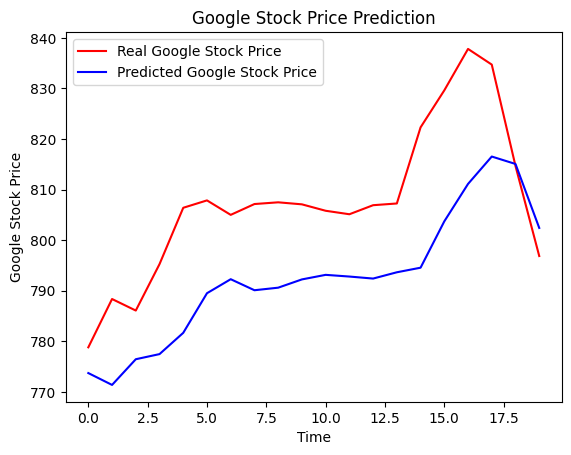

In [35]:
sns.lineplot(data=test_data.flatten(), color='red', label='Real Google Stock Price')
sns.lineplot(data=predictected_stock_price.flatten(), color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [36]:
model.save('Google_stock_price_prediction.h5')